Lecture 3: text normalization, intro to word embeddings
===============

9/13/2024, CS 4120 Natural Language Processing, ElSherief


Task 1: Vocabulary size
----

Next, we'll load in some data and graph two things:
1. The frequency of each item in our vocabulary
2. The size of our vocabulary as we take different samples of the data

In [1]:
# read in the text of moby dick (ensure the txt file is in the same directory as this notebook)
# if you do not already have - link to download text http://www.gutenberg.org/files/2701/2701-0.txt 
# right click and 'save as' into the directory this notebook is located as 'moby_dick.txt'
def read_file(filename: str) -> str:
    f = open(filename, "r", encoding='utf-8')
    contents = f.read()
    f.close()
    return contents


# read in the full contents of a file
contents = read_file("mobydick-1.txt")
print(len(contents)) # how long is this string?

1238243


In [2]:
# code
toks = contents.split()
print(len(toks))
print(len(set(toks)))

215829
33584


1. How many tokens are in *Moby Dick* if you `tokenize` using just `str.split()`? 215829
2. How big is the __vocabulary__ of *Moby Dick* using this method of tokenizing? 33584

In [3]:
import matplotlib.pyplot as plt

# https://docs.python.org/3/library/collections.html#collections.Counter
from collections import Counter

In [4]:
# count the occurrences of each token

# print out the 10 tokens in your vocabulary that appear the most often
# look at the collections documentation to see what methods Counters have

tok_counts = Counter(toks)
tok_counts.most_common(10)

[('the', 13851),
 ('of', 6638),
 ('and', 6000),
 ('a', 4549),
 ('to', 4529),
 ('in', 3904),
 ('that', 2692),
 ('his', 2428),
 ('I', 1723),
 ('with', 1695)]

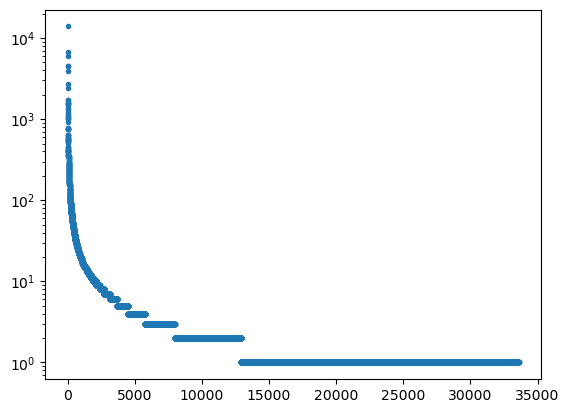

In [5]:
# make a graph of count vs. token item for each token
# in your vocabulary
# x axis will be token number 
# - (use the numbers from 0 -> number of items in your vocabulary) 
# - (this will keep your x-axis readable)
# y axis will be counts
# you may want to use a log scale (plt.yscale('log'))

xs = [i for i in range(len(tok_counts))]
ys = [v for k, v in tok_counts.most_common()]

plt.plot(xs, ys, ".")
plt.yscale('log')
plt.show()

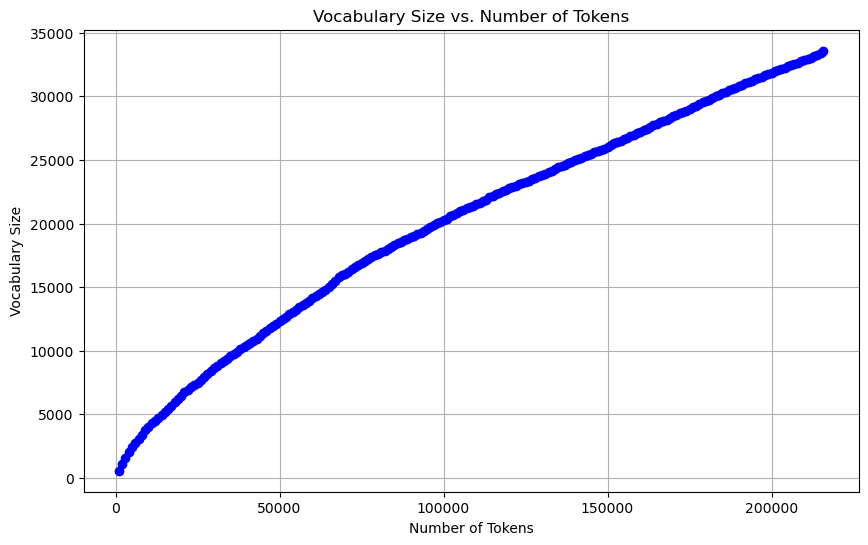

In [6]:
# next, create a graph of vocabulary size vs number of tokens
# y-axis will be vocabulary size
# x-axis will be number of tokens
# you need not graph a point every number from 0 -> len(toks)
# (pick a sensible interval)
import matplotlib.pyplot as plt
def heaps_law(toks: list) -> None:
    vocab_sizes = []
    token_counts = []
    unique_words = set()
    
    # We'll sample every 1000 tokens to plot to keep the graph readable and performant
    sample_interval = 1000
    
    for index, token in enumerate(toks):
        unique_words.add(token)
        # Record the vocabulary size at each interval
        if (index + 1) % sample_interval == 0:
            vocab_sizes.append(len(unique_words))
            token_counts.append(index + 1)
    
    # Ensure final counts are included if not a perfect multiple of the interval
    if len(toks) % sample_interval != 0:
        vocab_sizes.append(len(unique_words))
        token_counts.append(len(toks))
    
    plt.figure(figsize=(10, 6))
    plt.plot(token_counts, vocab_sizes, marker='o', linestyle='-', color='b')
    plt.title('Vocabulary Size vs. Number of Tokens')
    plt.xlabel('Number of Tokens')
    plt.ylabel('Vocabulary Size')
    plt.grid(True)
    plt.show()

# Example usage; assuming `toks` is available from previous code cells
heaps_law(toks)

# call your function with the Moby Dick tokens

In [7]:
# load in more data and see how your graph changes (or doesn't)

In [8]:
# load in even more data and see how this pattern continues (or doesn't)


3. Comparing your three graphs, what is the maximum value (roughly) on the y-axis for each graph? __YOUR ANSWER HERE__

Task 2: install `nltk`
-----

If you finish the first task, work on making sure that you have `nltk` downloaded and accessible to your jupyter notebooks. While you will not be allowed to use `nltk` for *most* of your homework, we will use it frequently in class to demonstrate tools. 

[`nltk`](https://www.nltk.org/) (natural language toolkit) is a python package that comes with many useful implementations of NLP tools and datasets.

From the command line, using pip: `pip3 install nltk`

[installing nltk](https://www.nltk.org/install.html)

In [16]:
!pip3 install nltk

In [10]:
import nltk

# the stemmer we'll use
from nltk.stem.porter import PorterStemmer

# also grab a lemmatizer
from nltk.stem import WordNetLemmatizer

# for the tokenizer that we're going to use
# won't cause an error if you've already downloaded it
nltk.download('punkt')
# for the lemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ryan4\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ryan4\AppData\Roaming\nltk_data...


True

In [11]:
# an example for you
example = "N.K. Jemison is a science fiction author."
words = nltk.word_tokenize(example)

# not perfect, but much better
print(words)

['N.K', '.', 'Jemison', 'is', 'a', 'science', 'fiction', 'author', '.']


In [12]:
# using the nltk tokenizer, tokenize Moby Dick


4. How many tokens do you have now? how big is the vocabulary? Are these numbers larger or smaller than using `str.split()` to tokenize? __YOUR ANSWER HERE__

In [13]:
porter_stemmer = PorterStemmer()

# example stemming at the individual token level
for w in moby_nltk_tokens[:5]:
    print(porter_stemmer.stem(w))
    


NameError: name 'moby_nltk_tokens' is not defined

5. How big is the vocabulary of stems? __YOUR ANSWER HERE__

In [ ]:
# how many lemmas in the vocabulary?
wordnet_lemmatizer = WordNetLemmatizer()
        
# the lemmatizer works using the method .lemmatize(word)


6. How big is the vocabulary of lemmas? __YOUR ANSWER HERE__

In [ ]:
# code

7. make a graph of heap's law with separate series for tokens, stems, and lemmas. Do they follow the same patterns? __YOUR ANSWER HERE__